In [ ]:
from google.colab import files
import pandas as pd

# Upload file manually
uploaded = files.upload()

# Get filename automatically from uploaded dict
file_name = list(uploaded.keys())[0]

# Read the file
df = pd.read_excel(file_name)

# Show first 5 rows
df.head()


Saving gform responses.xlsx to gform responses (3).xlsx


,Name,Age Group,Gender,Occupation,City /Location,Which Quick Commerce platforms do you use regularly?,How frequently do you order from them?,What is your average spend per order?,What time of day do you usually order?,What motivates you to order from quick commerce platforms,What categories do you usually buy?,"On a scale of 1 to 5, how satisfied are you with the quick commerce experience?",Have you faced any issues while ordering?,Do you plan to continue using quick commerce platforms in the future?,What would improve your experience with these platforms?
0,Aanya Gupta,18–24,Female,Student,Delhi,Zepto,1–2 times a month,₹100 – ₹300,Anytime depending on need,Convenience,"Groceries, Snacks & Beverages",4,No issues,Yes,4 on 5
1,Aaryan,18–24,Male,Student,Delhi,"Blinkit, Instamart",2–3 times a week,₹300 – ₹500,Anytime depending on need,"Fast delivery, Discounts/offers","Groceries, Snacks & Beverages",5,Missing/Wrong items,Yes,-
2,Aashi,35–44,Female,Other,Delhi,"Blinkit, Zepto",Daily,₹300 – ₹500,Evening (4pm–9pm),Fast delivery,"Groceries, Snacks & Beverages, Household Essen...",4,Price discrepancy,Yes,Improve price discrepancy
3,Aashish,18–24,Male,Student,Delhi,Zepto,Daily,₹100 – ₹300,Evening (4pm–9pm),"Discounts/offers, Convenience","Snacks & Beverages, Household Essentials",4,Late delivery,Yes,No comments
4,Aastha Singh Yadav,18–24,Female,Student,New Delhi,"Blinkit, Zepto",Rarely,₹100 – ₹300,Anytime depending on need,"Fast delivery, Convenience",Others,4,"Missing/Wrong items, Price discrepancy",Yes,Although very convenient but a lot of times th...


In [ ]:
df.columns.tolist()


['Name',
 'Age Group  ',
 'Gender  ',
 'Occupation',
 'City /Location',
 'Which Quick Commerce platforms do you use regularly?  ',
 'How frequently do you order from them?  ',
 'What is your average spend per order?',
 'What time of day do you usually order?',
 'What motivates you to order from quick commerce platforms  ',
 'What categories do you usually buy?  ',
 'On a scale of 1 to 5, how satisfied are you with the quick commerce experience?  ',
 'Have you faced any issues while ordering?  ',
 'Do you plan to continue using quick commerce platforms in the future?  ',
 'What would improve your experience with these platforms?']

In [ ]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()


In [ ]:
platform_data = df["Which Quick Commerce platforms do you use regularly?"]


In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Make a copy of relevant column
platform_data = df["Which Quick Commerce platforms do you use regularly?"].dropna()

# Split and count
from collections import Counter
all_platforms = platform_data.str.split(', ').sum()
platform_counts = Counter(all_platforms)

# Convert to DataFrame
platform_df = pd.DataFrame(platform_counts.items(), columns=['Platform', 'Count'])
platform_df.sort_values(by='Count', ascending=False, inplace=True)

platform_df


,Platform,Count
0,Zepto,72
1,Blinkit,67
2,Instamart,35
3,Amazon Fresh,9
4,BigBasket Now,6
5,flipkart Now,1
6,Flipkart,1
7,,1


from matplotlib import pyplot as plt
platform_df['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
platform_df.groupby('Platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
platform_df['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(platform_df['Platform'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(platform_df, x='Count', y='Platform', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Remove empty platform name if any
platform_df = platform_df[platform_df['Platform'].str.strip() != '']



<ipython-input-16-fd76f8890764>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_df, x='Platform', y='Count', palette='viridis')


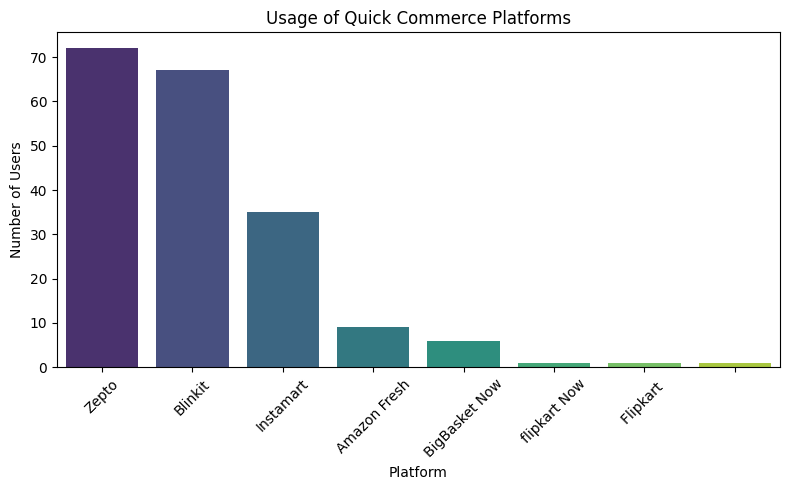

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=platform_df, x='Platform', y='Count', palette='viridis')
plt.title('Usage of Quick Commerce Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='Platform', ylabel='Count'>

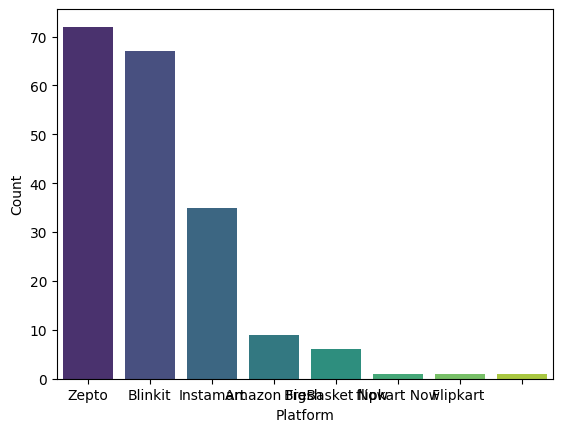

In [ ]:
sns.barplot(data=platform_df, x='Platform', y='Count', hue='Platform', palette='viridis', legend=False)


"On a scale of 1 to 5, how satisfied are you with the quick commerce experience?"

In [ ]:
# Clean column names again just in case
df.columns = df.columns.str.strip()

# Convert Satisfaction column to numeric
df['Satisfaction'] = pd.to_numeric(
    df["On a scale of 1 to 5, how satisfied are you with the quick commerce experience?"],
    errors='coerce'
)

# Count of each rating
satisfaction_counts = df['Satisfaction'].value_counts().sort_index()
satisfaction_counts


,count
Satisfaction,
1,2
2,3
3,16
4,60
5,24


<ipython-input-19-18a59ab159d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='crest')


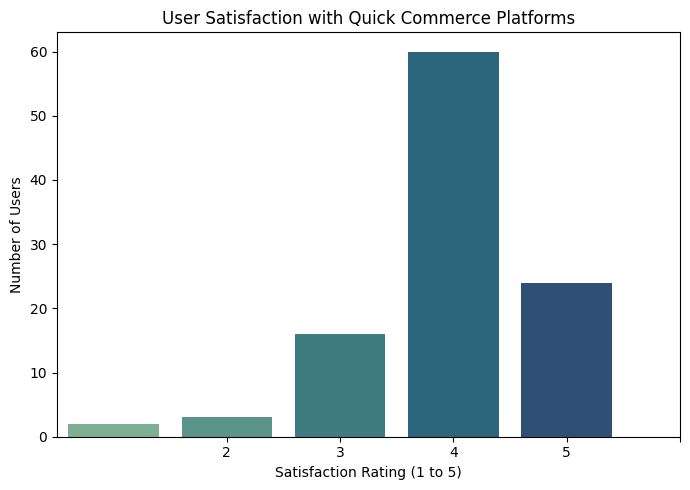

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette='crest')

plt.title('User Satisfaction with Quick Commerce Platforms')
plt.xlabel('Satisfaction Rating (1 to 5)')
plt.ylabel('Number of Users')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()


In [3]:
# Clean column name if needed
df.columns = df.columns.str.strip()

# Count values in frequency column
freq_counts = df['How frequently do you order from them?'].value_counts()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x=freq_counts.index, y=freq_counts.values, palette='rocket')
plt.title('Ordering Frequency on Quick Commerce Platforms')
plt.xlabel('Frequency')
plt.ylabel('Number of Users')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [5]:
import pandas as pd

# Upload file from your system (if in Google Colab)
from google.colab import files
uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('gform responses.xlsx')
df.columns = df.columns.str.strip()  # Clean column names


Saving gform responses.xlsx to gform responses (1).xlsx


<ipython-input-6-c692ae583513>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_counts.index, y=freq_counts.values, palette='rocket')


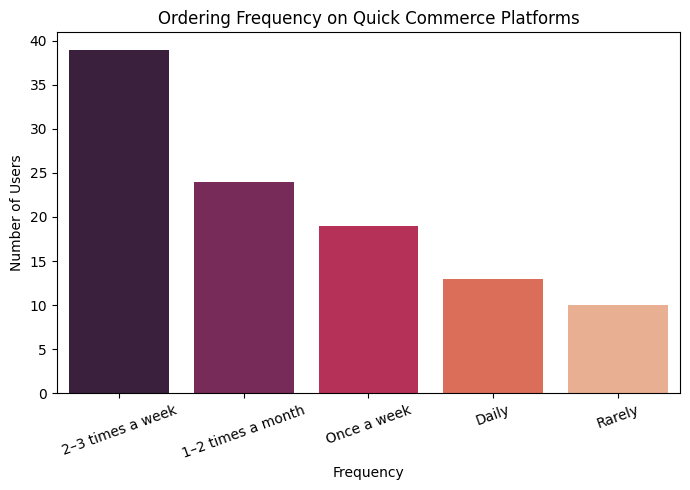

In [6]:
freq_counts = df['How frequently do you order from them?'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x=freq_counts.index, y=freq_counts.values, palette='rocket')
plt.title('Ordering Frequency on Quick Commerce Platforms')
plt.xlabel('Frequency')
plt.ylabel('Number of Users')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


<ipython-input-7-84d269f45732>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spend_counts.index, y=spend_counts.values, palette='magma')


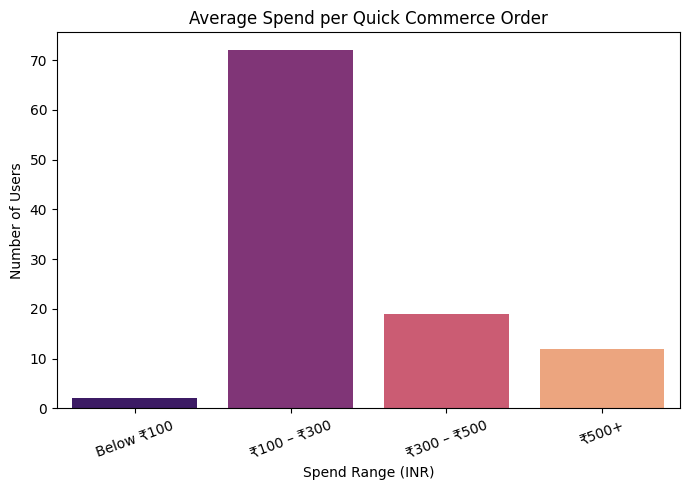

In [7]:
# Value counts for spend ranges
spend_counts = df['What is your average spend per order?'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x=spend_counts.index, y=spend_counts.values, palette='magma')
plt.title('Average Spend per Quick Commerce Order')
plt.xlabel('Spend Range (INR)')
plt.ylabel('Number of Users')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


<ipython-input-8-194f36f4d43d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_counts.index, y=time_counts.values, palette='coolwarm')


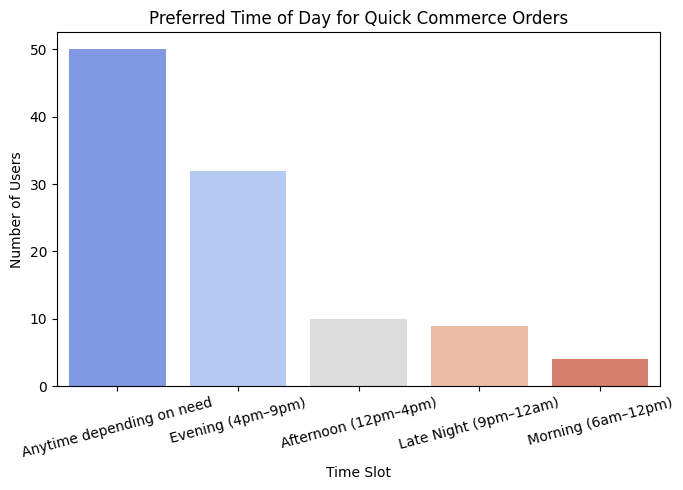

In [8]:
# Count responses by time of day
time_counts = df['What time of day do you usually order?'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=time_counts.index, y=time_counts.values, palette='coolwarm')
plt.title('Preferred Time of Day for Quick Commerce Orders')
plt.xlabel('Time Slot')
plt.ylabel('Number of Users')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [3]:
from google.colab import files
uploaded = files.upload()


Saving gform responses.xlsx to gform responses.xlsx


In [4]:
list(uploaded.keys())


['gform responses.xlsx']

In [5]:
df = pd.read_excel('gform responses.xlsx')  # or whatever exact name shows up
df.columns = df.columns.str.strip()


<ipython-input-6-7e4df2102d2b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=motivation_counts.index, y=motivation_counts.values, palette='Set2')


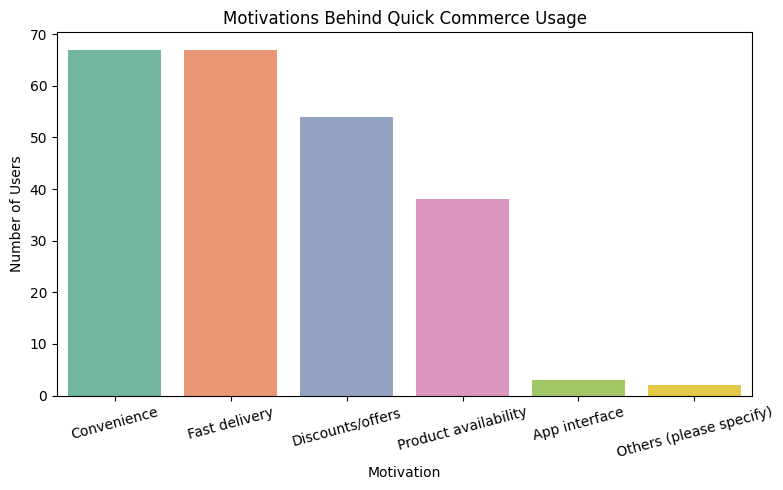

In [6]:
# Splitting multi-select responses (comma-separated)
df['Motivation_Split'] = df['What motivates you to order from quick commerce platforms'].str.split(',')

# Exploding to count individual motivations
motivation_exploded = df.explode('Motivation_Split')
motivation_counts = motivation_exploded['Motivation_Split'].str.strip().value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=motivation_counts.index, y=motivation_counts.values, palette='Set2')
plt.title('Motivations Behind Quick Commerce Usage')
plt.xlabel('Motivation')
plt.ylabel('Number of Users')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


<ipython-input-7-15ac985341a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')


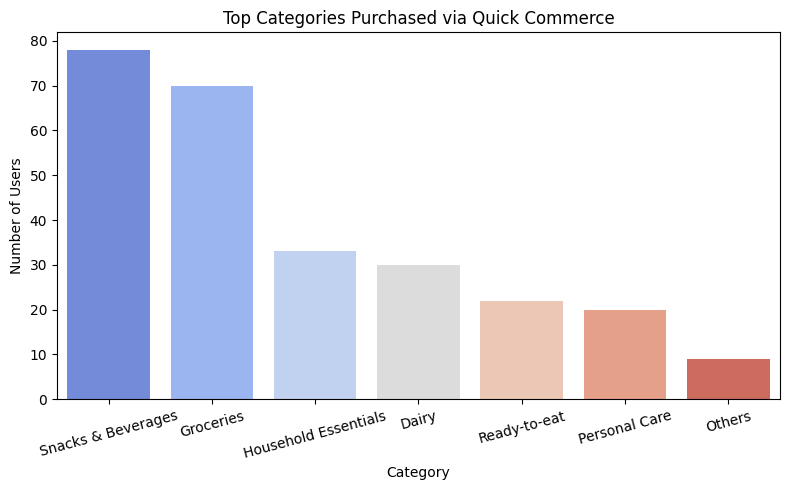

In [7]:
# Split and count
df['Categories_Split'] = df['What categories do you usually buy?'].str.split(',')

categories_exploded = df.explode('Categories_Split')
category_counts = categories_exploded['Categories_Split'].str.strip().value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.title('Top Categories Purchased via Quick Commerce')
plt.xlabel('Category')
plt.ylabel('Number of Users')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


<ipython-input-8-4ed3492e7e47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_counts.index.astype(str), y=satisfaction_counts.values, palette='crest')


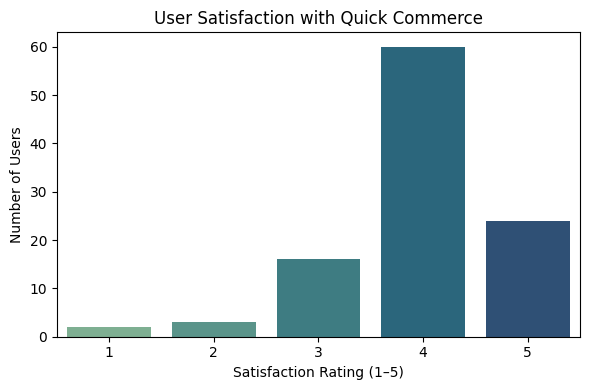

In [8]:
# Count satisfaction levels
satisfaction_counts = df['On a scale of 1 to 5, how satisfied are you with the quick commerce experience?'].value_counts().sort_index()

# Barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=satisfaction_counts.index.astype(str), y=satisfaction_counts.values, palette='crest')
plt.title('User Satisfaction with Quick Commerce')
plt.xlabel('Satisfaction Rating (1–5)')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


<ipython-input-9-2f4facc70e65>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_counts.index, y=issue_counts.values, palette='magma')


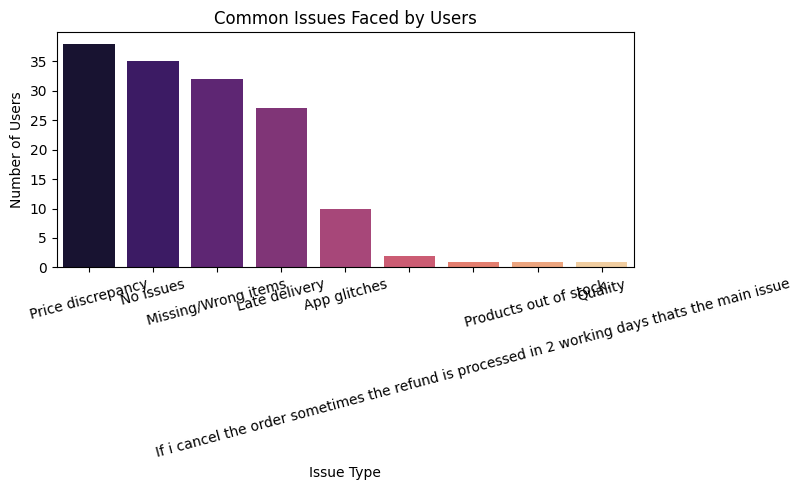

In [9]:
# Split and clean
df['Issues_Split'] = df['Have you faced any issues while ordering?'].str.split(',')

issues_exploded = df.explode('Issues_Split')
issue_counts = issues_exploded['Issues_Split'].str.strip().value_counts()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=issue_counts.index, y=issue_counts.values, palette='magma')
plt.title('Common Issues Faced by Users')
plt.xlabel('Issue Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


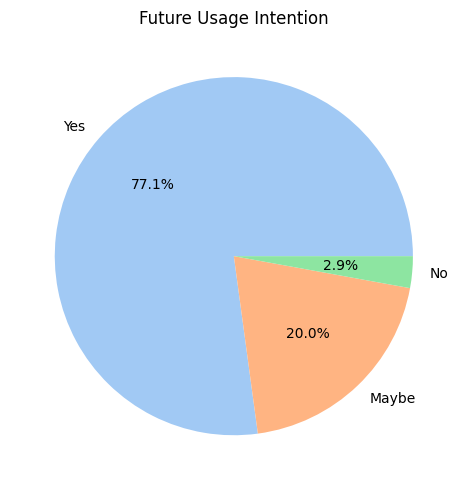

In [10]:
# Count future usage intention
future_usage = df['Do you plan to continue using quick commerce platforms in the future?'].value_counts()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(future_usage.values, labels=future_usage.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Future Usage Intention')
plt.tight_layout()
plt.show()


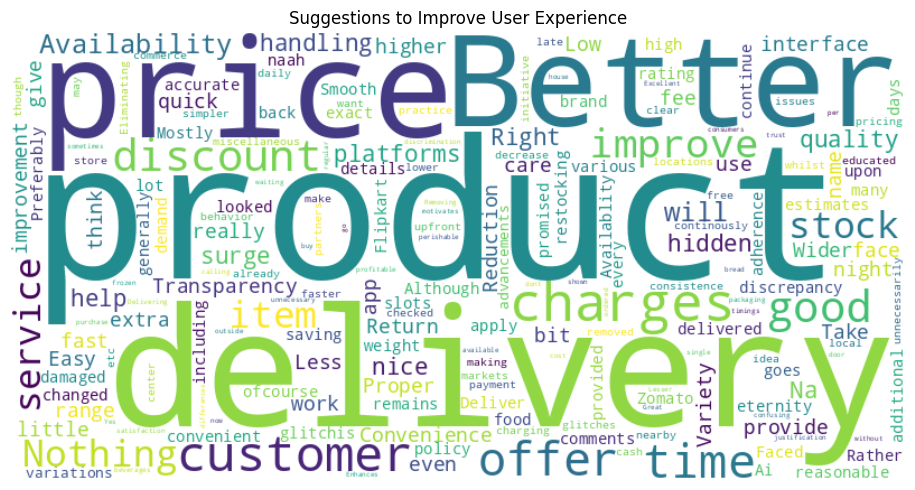

In [11]:
from wordcloud import WordCloud, STOPWORDS

# Combine all responses
text = " ".join(str(s) for s in df['What would improve your experience with these platforms?'].dropna())

# Add stopwords if needed
stopwords = set(STOPWORDS)
stopwords.update(["would", "could", "platform", "order", "ordering", "experience"])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='viridis').generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Suggestions to Improve User Experience')
plt.tight_layout()
plt.show()
